### 1.Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mtp
import seaborn as sns

In [2]:
df=pd.read_csv("C:\\Users\\hp\Downloads\\healthcare-dataset-stroke-data.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.keys()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [4]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
df.shape

(5110, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 2. Data Cleaning

In [7]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [8]:
df=df.fillna(df[["bmi"]].median())
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### 3. Exploratory Dta Analysis

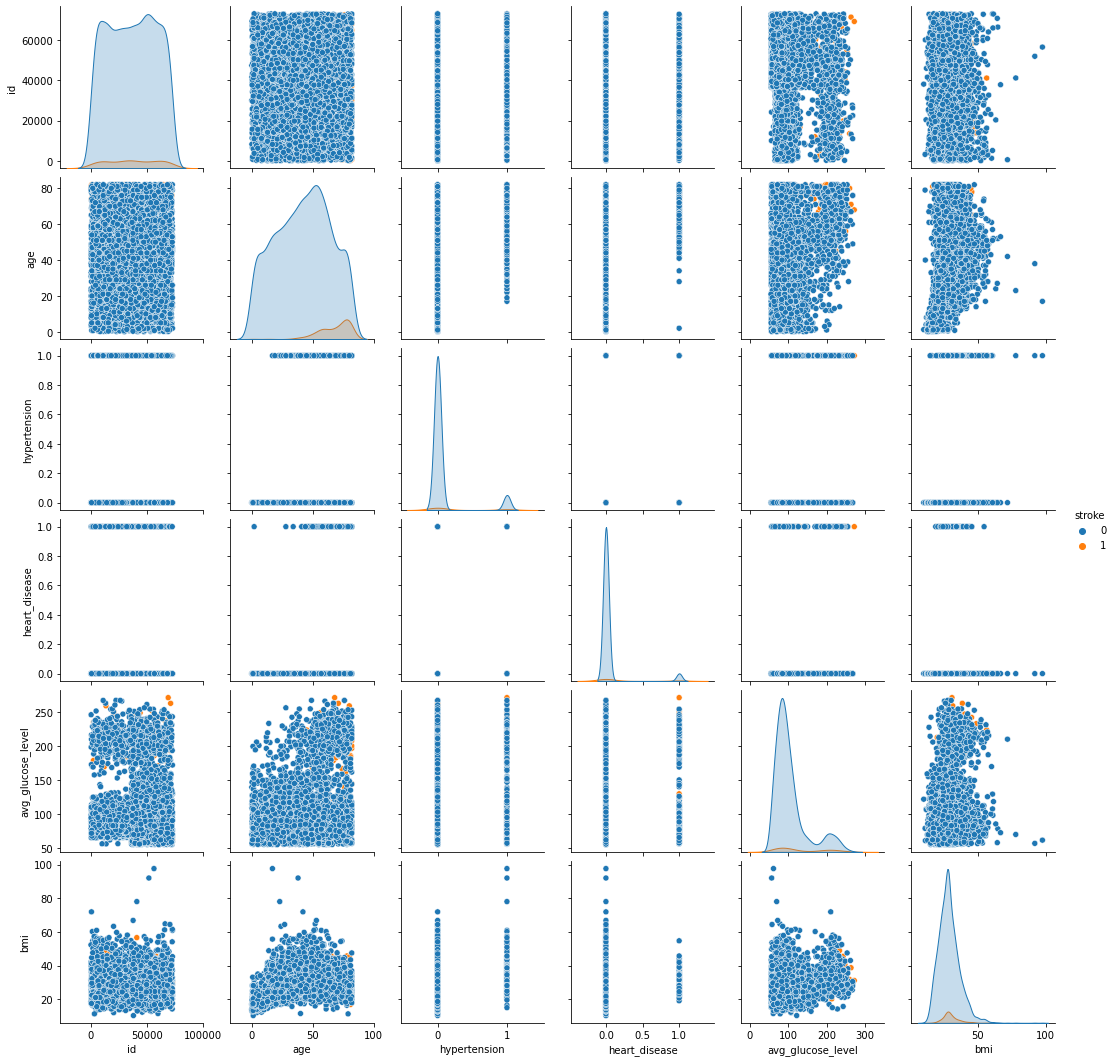

In [10]:
sns.pairplot(df, hue="stroke");


#### Numerical Value Analysis using boxplot


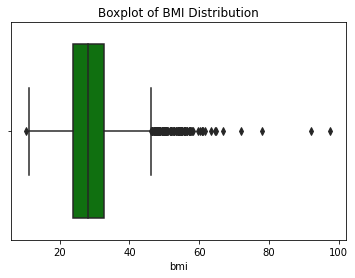

In [11]:
sns.boxplot(data=df,x=df["bmi"],color='green')
mtp.title("Boxplot of BMI Distribution");


79 counts of outliers detected in the 'bmi' column.Need to replace values more than 50 in bmi column to 50

In [12]:
df["bmi"] = pd.to_numeric(df["bmi"])
df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)

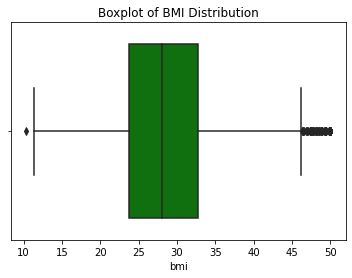

In [13]:
sns.boxplot(data=df,x=df["bmi"],color='green')
mtp.title("Boxplot of BMI Distribution");

In [14]:
numerical= df.drop(['stroke'], axis=1).select_dtypes('number').columns

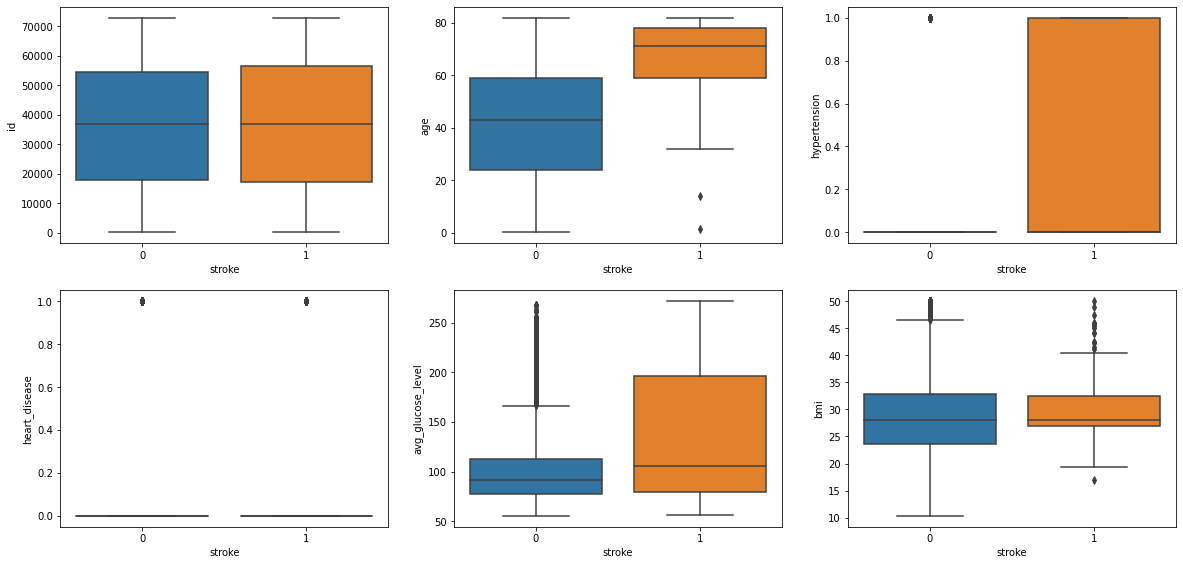

In [15]:
index = 0
mtp.figure(figsize=(20,20))
for feature in numerical:
    if feature != "stroke":
        index += 1
        mtp.subplot(4, 3, index)
        sns.boxplot(x='stroke', y=feature, data=df)

### 4. Data Preprocessing

#### Drop features not required to build our model

In [16]:
df= df.drop(['id'],axis='columns')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


####  We have to handle categorical columns before applying an algorithm.
#### Perform one-hot encoding on categorical features

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:

gender_encoder = LabelEncoder()
ever_married_encoder = LabelEncoder()
work_type_encoder = LabelEncoder()
Residence_type_encoder = LabelEncoder()
smoking_status_encoder = LabelEncoder()

In [19]:
gender_encoder.fit(df['gender'])
ever_married_encoder.fit(df['ever_married'])
work_type_encoder.fit(df['work_type'])
Residence_type_encoder.fit(df['Residence_type'])
smoking_status_encoder.fit(df['smoking_status'])

LabelEncoder()

In [20]:

df['gender'] =  gender_encoder.transform(df['gender'])
df['ever_married'] =  ever_married_encoder.transform(df['ever_married'])
df['work_type'] =  work_type_encoder.transform(df['work_type'])
df['Residence_type'] =  Residence_type_encoder.transform(df['Residence_type'])
df['smoking_status'] =  smoking_status_encoder.transform(df['smoking_status'])

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


##### Enocding is as it follows:
 gender (Male - 1, Female - 0)
ever_maried (Yes - 1, No - 0)
work_type (Govt_job - 0, Never_worked - 1, Private - 2, Self-employed - 3,children - 4)
 Residence_type (Urban - 1, Rural - 0)

### 5. Building model

In [21]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [22]:
X = df.drop(['stroke'], axis = 1)
y = df['stroke']



In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [25]:
X_train.shape, X_test.shape

((3577, 10), (1533, 10))

##### Handling imbalance data

In [26]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_sm, y_sm = sm.fit_resample(X, y)

y_sm.value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

#####  Train | Test Split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, stratify = y_sm, random_state = 101)

In [28]:
X_train.shape, X_test.shape

((6805, 10), (2917, 10))

### 6) FEATURE SCALING

Feature scaling (Normalization) is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step.


In [37]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [29]:
#for Normalisation
from sklearn.preprocessing import MinMaxScaler 

In [30]:
scaler=MinMaxScaler()


In [31]:
normalized_array = scaler.fit_transform(df[['age','bmi','avg_glucose_level']])
normalized_df = pd.DataFrame(normalized_array, columns=['age','bmi','avg_glucose_level'])


In [32]:
df[['age', 'bmi', 'avg_glucose_level']] = normalized_df

In [33]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0.816895,0,1,1,2,1,0.801265,0.662469,1,1
1,0,0.743652,0,0,1,3,0,0.679023,0.448363,2,1
2,1,0.975586,0,1,1,2,0,0.234512,0.559194,2,1
3,0,0.597168,0,0,1,2,1,0.536008,0.607053,3,1
4,0,0.963379,1,0,1,3,0,0.549349,0.345088,2,1


## Applying algorithm

In [34]:
stroke=df['stroke'].value_counts()
stroke

0    4861
1     249
Name: stroke, dtype: int64

### 1. Logistic Regression

In [35]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,precision_score, f1_score, recall_score

In [38]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 51, penalty = 'l2')
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)
accuracy_score(y_test, y_pred_lr)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8045937607130613

### 2.Random Forest

In [40]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.9400068563592733

## 3.Decision Tree

In [41]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.9064106959204662

#### random forest have highest accuracy

### Confusion Matrix

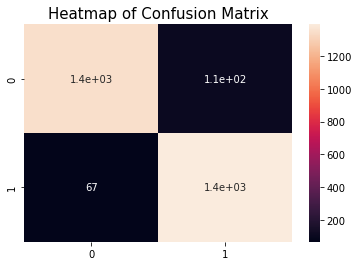

In [44]:
cm = confusion_matrix(y_test, y_pred_rf)
mtp.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
mtp.show()

### Classification Report of Model

In [45]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1458
           1       0.93      0.95      0.94      1459

    accuracy                           0.94      2917
   macro avg       0.94      0.94      0.94      2917
weighted avg       0.94      0.94      0.94      2917



### Cross-validation of the ML model

In [46]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = rf_classifier , X = X_train, y = y_train, cv = 10)
print("Cross validation of XGBoost model = ",cross_validation)
print("Cross validation of XGBoost model (in mean) = ",cross_validation.mean())


Cross validation of XGBoost model =  [0.92511013 0.93685756 0.94126285 0.92804699 0.94273128 0.92352941
 0.93529412 0.92941176 0.91617647 0.93382353]
Cross validation of XGBoost model (in mean) =  0.9312244104690335
